In [1]:
from ecmwfapi import ECMWFService
from Magics import toolbox as magics
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed

import random
from datetime import date, timedelta


In [5]:
def data(meteogram, parameter):
    yesterday = date.today() - timedelta(1)
    print yesterday.strftime('%Y%m%d')
    print meteogram, parameter
    json = "%s.json"
    key = {
            "url"   : "https://api.ecmwf.int/v1",
            "key"   : "83253855c912864513eb33f5fb1de322",
            "email" : "Sylvie.Lamy-Thepaut@ecmwf.int"
          }


    lat = random.randrange(-90, 90)
    lon = random.randrange(-180, 180)

    server = ECMWFService("meteogram", verbose=True, **key)

    yesterday = date.today() - timedelta(0)
    print yesterday.strftime('%Y%m%d')


    request = {
      "meteogram": meteogram,
      "param": parameter,
      "location": "%f/%f" % (lat, lon),
      "date": yesterday.strftime('%Y%m%d'),
      "time": "0000"
     }
    
    server.execute( request, json % parameter )


20161031
10days 2t
20161101
2016-11-01 15:16:31 ECMWF API python library 1.4.1
2016-11-01 15:16:31 ECMWF API at https://api.ecmwf.int/v1
GET https://api.ecmwf.int/v1/who-am-i
Code 200
Content-Type application/json
Content-Length None
Location None
{
    "first_name": "Sylvie", 
    "last_name": "Lamy-Thepaut", 
    "uid": "cgs", 
    "code": 200, 
    "full_name": "Sylvie Lamy-Thepaut", 
    "email": "Sylvie.Lamy-Thepaut@ecmwf.int"
}
Status None
2016-11-01 15:16:31 Welcome Sylvie Lamy-Thepaut
GET https://api.ecmwf.int/v1/services/meteogram/news
Code 200
Content-Type application/json
Content-Length None
Location None
{
    "news": "Welcome to ECMWF Web API Meteogram Service\r\n", 
    "code": 200
}
Status None
2016-11-01 15:16:31 Welcome to ECMWF Web API Meteogram Service
2016-11-01 15:16:31 
POST https://api.ecmwf.int/v1/services/meteogram/requests
Code 303
Content-Type application/json
Content-Length None
Location http://stream.ecmwf.int/data/atls01/data/data01/scratch/meteogram_data-

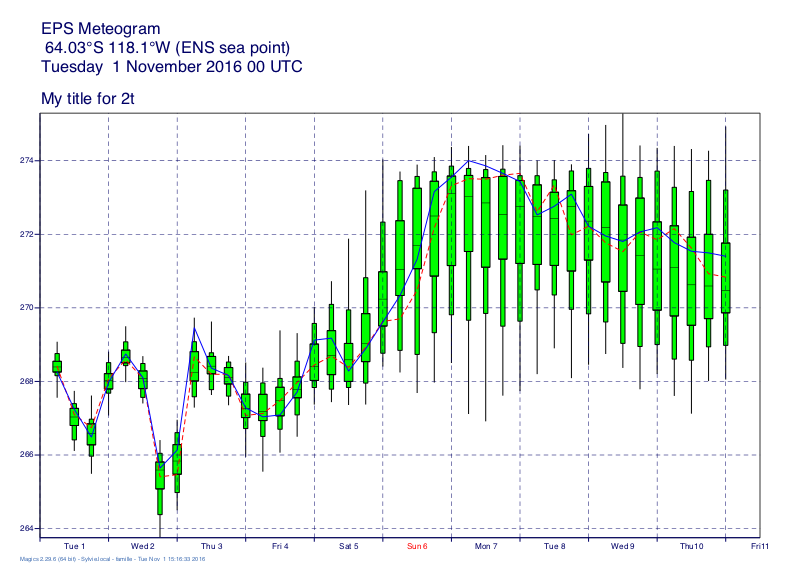

In [6]:


colour = widgets.ColorPicker(
    concise= False,
    description='Pick a color',
    value='blue'
)
colour.layout.width = "50%"
meteogram = widgets.Dropdown(
    options=['10days', '15days'],
    value='10days',
    description='meteogran:',
    disabled=False,
    button_style='' # 'success', 'info', 'warning', 'danger' or ''
)

parameter = widgets.Dropdown(
    options=['2t', "tcc", "10fg6", "hcc", "lcc", "mcc", "sf", "tp", "ws"],
    value='2t',
    description='Parameter:',
    disabled=False,
    button_style='' # 'success', 'info', 'warning', 'danger' or ''
)

def epsgram(meteogram, parameter, colour):
    data(meteogram, parameter)
    return  magics.epsgram(parameter, 
                           "%s.json" % parameter, 
                           title = "My title for %s" % (parameter), 
                           colour = colour)

from IPython.display import display

ui = interactive(epsgram, meteogram=meteogram, parameter = parameter, colour=colour)

box = widgets.VBox(ui.children)
display(box)



